# Cancer Dataset analysis

In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.5.0'

In [3]:
from tensorflow import keras

In [4]:
keras.__version__

'2.5.0'

In [5]:
import tensorflow.keras.backend as K

In [6]:
from tensorflow.keras import backend

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## For plotting
import plotly.express as px
import plotly.graph_objects as go
import plotly.tools

In [8]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [9]:
np.random.seed(2021)

In [10]:
#from google.colab import files
#uploaded = files.upload()

In [10]:
from matplotlib import pyplot

#import neccessary Libraries and modules

import os
from glob import glob
import random
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Model
#from keras.applications.vgg16 import VGG16

from scipy.optimize import fmin_l_bfgs_b
from tensorflow.keras.preprocessing.image import save_img as imsave

#from IPython.display import image
from PIL import Image

In [11]:
import warnings
warnings.filterwarnings('ignore')

In [20]:
imagePatches = glob('./breast-histopathology-images/**/*.png', recursive=True)
for filename in imagePatches[0:10]:
    print(filename)

./breast-histopathology-images/9036/0/9036_idx5_x1051_y2401_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x2951_y951_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x3001_y1451_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x3051_y801_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x951_y1901_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x2251_y751_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x1901_y401_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x3201_y1101_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x3351_y1251_class0.png
./breast-histopathology-images/9036/0/9036_idx5_x2051_y2551_class0.png


In [21]:
class0 = [] # 0 = no cancer
class1 = [] # 1 = cancer

for filename in imagePatches:
    if filename.endswith("class0.png"):
         class0.append(filename)
    else:
        class1.append(filename)

In [22]:
len(class0)

38260

In [23]:
len(class1)

13756

In [24]:
sampled_class0 = random.sample(class0, 13000)
sampled_class1 = random.sample(class1, 13000)

In [25]:
# Import OpenCV

from matplotlib.image import imread
import cv2_tools
import cv2

In [26]:
def get_image_arrays(data, label):
    img_arrays = []
    for i in data:
        if i.endswith('.png'):
            img = cv2.imread(i ,cv2.IMREAD_COLOR)
            #img = imread(i ,cv2.IMREAD_COLOR)
            img_sized = cv2.resize(img, (50, 50), interpolation=cv2.INTER_LINEAR)
            img_arrays.append([img_sized, label])
    return img_arrays

In [27]:
class0_array = get_image_arrays(sampled_class0, 0)
class1_array = get_image_arrays(sampled_class1, 1)

In [23]:
#from keras.preprocessing.image import load_img, img_to_array

In [32]:
def show_img(files):
    plt.figure(figsize= (11,12))
    ind = np.random.randint(0, len(files), 25)
    i=0
    for loc in ind:
        plt.subplot(5,5,i+1)
        sample = load_img(files[loc], target_size=(150,150))
        sample = img_to_array(sample)
        plt.axis("off")
        plt.imshow(sample.astype("uint8"))
        i+=1

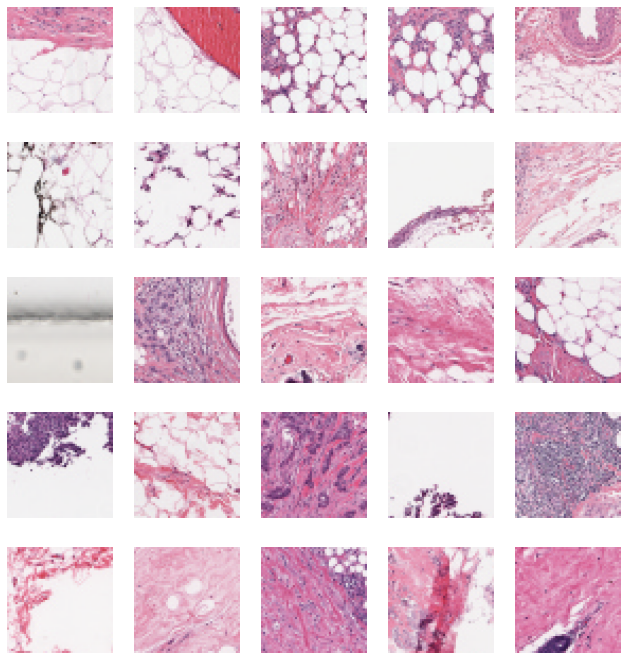

In [33]:
show_img(imagePatches)

In [34]:
combined_data = np.concatenate((class0_array, class1_array))
random.seed(2021)
random.shuffle(combined_data)

In [35]:
X = []
y = []

for features,label in combined_data:
    X.append(features)
    y.append(label)

In [36]:
X = np.array(X).reshape(-1, 50, 50, 3)

In [37]:
X.shape

(26000, 50, 50, 3)

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3,
                                                    stratify = y,
                                                    random_state = 2021)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(18200, 50, 50, 3) (7800, 50, 50, 3) (18200, 2) (7800, 2)


In [42]:
y_test[:,1].sum()

1180.0

In [51]:
def convolutional_model():        
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(50,50,3)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(64, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    adam = Adam(learning_rate=0.0001)
    #binary_crossentropy is used because Cancer detecion is a binary classification problem
    model.compile(loss="binary_crossentropy", optimizer=adam, metrics=['accuracy'])   

    return model

In [90]:
def cnn_2nd_model():
    model = Sequential()
    model.add(Conv2D(64, kernel_size=3, padding='same', activation='relu', input_shape=(50,50,3)))
    model.add(BatchNormalization())
    model.add(Activation("relu"))
    model.add(MaxPool2D(pool_size = (2,2))) 
    model.add(Dropout(0.2))
    #
    model.add(Conv2D(64, kernel_size=3, activation='relu'))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    #model.add(Dense(256, activation="relu"))
    #model.add(Dense(64, activation="relu"))
    #model.add(Dense(24, activation="relu"))
    model.add(Dense(2, activation="softmax"))
    adam = Adam(learning_rate=0.0001)
    #binary_crossentropy is used because Cancer detecion is a binary classification problem
    model.compile(loss="binary_crossentropy", 
                  optimizer=adam, 
                  metrics=['accuracy'])
    
    return model

In [87]:
from keras.applications.vgg16 import VGG16, preprocess_input

def transfer_vgg16():
    '''
    Transfer learning with  VGG16 model
    '''
    vgg16_model = VGG16(include_top = False,
                        input_shape = (50,50,3),
                        weights = 'imagenet')

    model = Sequential()
    model.add(vgg16_model)
    model.add(Flatten())
    #model.add(Dense(1024, activation="relu"))
    #model.add(Dropout(0.5))
    model.add(Dense(32, activation="relu"))
    model.add(Dropout(0.5))
    model.add(Dense(2, activation="softmax"))

    # Freeze the initial layers, the rest are trainable with the new data
    for layer in vgg16_model.layers[:-12]:
        layer.trainable = False

    '''# Check the trainable status of the individual layers
    for layer in vgg16_model.layers:
        print(layer, layer.trainable)'''
    adam = Adam(learning_rate=0.001)
    #binary_crossentropy is used because Cancer detecion is a binary classification problem
    model.compile(loss="binary_crossentropy", 
                  optimizer=adam, 
                  metrics=['accuracy'])
    
    return model

In [91]:
strategy = tf.distribute.get_strategy()
with strategy.scope():
    model = cnn_2nd_model()
    
#Training and Testing the CNN 

#epochs determines the number of times the learning algorithm iterates over the dataset.

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    batch_size=128,
                    epochs= 20, 
                    verbose = 1, 
                    callbacks=[EarlyStopping(monitor='val_loss',
                                             patience=6, 
                                             min_delta=0.0001,
                                             restore_best_weights=True)]
                   )

Epoch 1/20
143/143 [==============================] - 78s 546ms/step - loss: 0.3359 - accuracy: 0.8558 - val_loss: 0.5324 - val_accuracy: 0.8540
Epoch 2/20
143/143 [==============================] - 83s 581ms/step - loss: 0.2879 - accuracy: 0.8757 - val_loss: 0.2861 - val_accuracy: 0.8791
Epoch 3/20
143/143 [==============================] - 73s 513ms/step - loss: 0.2751 - accuracy: 0.8817 - val_loss: 0.2820 - val_accuracy: 0.8797
Epoch 4/20
143/143 [==============================] - 73s 514ms/step - loss: 0.2651 - accuracy: 0.8879 - val_loss: 0.2648 - val_accuracy: 0.8874
Epoch 5/20
143/143 [==============================] - 74s 521ms/step - loss: 0.2556 - accuracy: 0.8911 - val_loss: 0.2567 - val_accuracy: 0.8936
Epoch 6/20
143/143 [==============================] - 72s 501ms/step - loss: 0.2440 - accuracy: 0.8973 - val_loss: 0.2581 - val_accuracy: 0.8973
Epoch 7/20
143/143 [==============================] - 72s 506ms/step - loss: 0.2379 - accuracy: 0.9010 - val_loss: 0.2462 - val_ac

In [92]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 50, 50, 64)        1792      
_________________________________________________________________
batch_normalization_5 (Batch (None, 50, 50, 64)        256       
_________________________________________________________________
activation_5 (Activation)    (None, 50, 50, 64)        0         
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 25, 25, 64)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 25, 25, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 23, 23, 64)        36928     
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 21, 21, 32)      

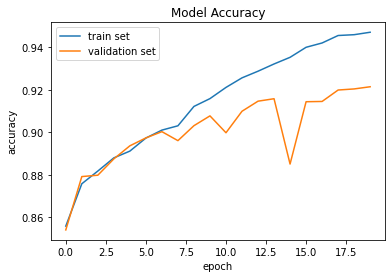

In [93]:
#plotting the Accuracy of validation and training sets
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'], loc='upper left')
plt.show()

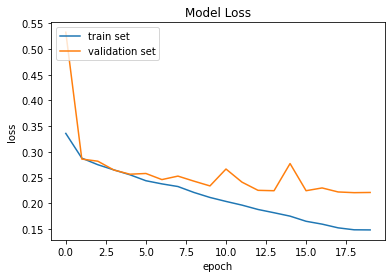

In [94]:
#plotting the loss of validation and training sets
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train set', 'validation set'], loc='upper left')
plt.show()

In [95]:
#Testing The CNN Model
pred = model.predict_proba(X_test)

In [96]:
pred[:,1]

array([6.0538542e-07, 5.8084584e-06, 4.8131646e-05, ..., 8.8310254e-01,
       9.9856645e-01, 7.5404387e-04], dtype=float32)

In [107]:
res = []
for prediction in pred[:,1]:
    if(prediction > 0.5):
        res.append(1)
    else:
        res.append(0)

In [108]:
from sklearn.metrics import classification_report, confusion_matrix
#Final Classification Report using Confusion Matrix
print(confusion_matrix(y_test[:,1], res))
print(classification_report(y_test[:,1], res))

[[6401  219]
 [ 394  786]]
              precision    recall  f1-score   support

         0.0       0.94      0.97      0.95      6620
         1.0       0.78      0.67      0.72      1180

    accuracy                           0.92      7800
   macro avg       0.86      0.82      0.84      7800
weighted avg       0.92      0.92      0.92      7800



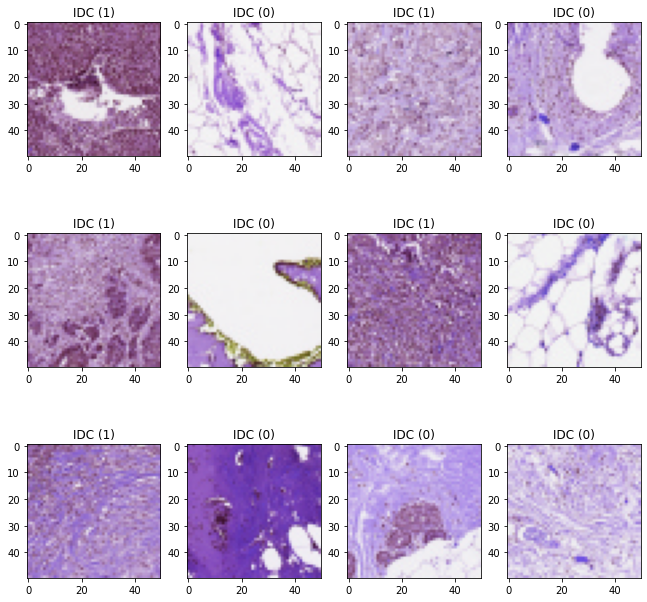

In [110]:
plt.figure(figsize= (11,11))
ind = np.random.randint(0, len(pred), 12)
i=0
#The patient having IDC is represented by IDC 1 ,IDC 0 otherwise.
for loc in ind:
    plt.subplot(3,4,i+1)
    plt.xlabel(None)
    plt.title("IDC ({})".format(res[loc]))
        
    plt.imshow(X_test[loc])
    i+=1